In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib as mplib
import matplotlib.pyplot as plt
import seaborn as sns

/Users/Ariel/Desktop/NYU/Summer 2021/Policy and Data Studio/Repos/Ariel_Medex/env/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [27]:
df = pd.read_csv('/Users/Ariel/Desktop/usa_00003.csv')

In [28]:
df.columns

Index(['YEAR', 'SAMPLE', 'SERIAL', 'CBSERIAL', 'HHWT', 'CLUSTER', 'STATEICP',
       'COUNTYICP', 'PUMA', 'STRATA', 'GQ', 'PERNUM', 'PERWT', 'SEX', 'AGE',
       'RACE', 'RACED', 'HISPAN', 'HISPAND', 'CITIZEN', 'YRSUSA2', 'HINSEMP',
       'HINSPUR', 'HINSCAID', 'EMPSTAT', 'EMPSTATD', 'INCTOT', 'POVERTY'],
      dtype='object')

In [29]:
df.describe

<bound method NDFrame.describe of         YEAR  SAMPLE  SERIAL       CBSERIAL   HHWT        CLUSTER  STATEICP  \
0       2009  200901  816419             89  150.0  2009008164191        13   
1       2009  200901  816422            147  213.0  2009008164221        13   
2       2009  200901  816422            147  213.0  2009008164221        13   
3       2009  200901  816422            147  213.0  2009008164221        13   
4       2009  200901  816422            147  213.0  2009008164221        13   
...      ...     ...     ...            ...    ...            ...       ...   
237142  2019  201901  923328  2019001412405   72.0  2019009233281        13   
237143  2019  201901  923328  2019001412405   72.0  2019009233281        13   
237144  2019  201901  923328  2019001412405   72.0  2019009233281        13   
237145  2019  201901  923328  2019001412405   72.0  2019009233281        13   
237146  2019  201901  923331  2019001412438   94.0  2019009233311        13   

        COUNTYICP

In [33]:
brooklyn = df[df['COUNTYICP'] == 470]
brooklyn.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEICP,COUNTYICP,PUMA,STRATA,...,HISPAND,CITIZEN,YRSUSA2,HINSEMP,HINSPUR,HINSCAID,EMPSTAT,EMPSTATD,INCTOT,POVERTY
1,2009,200901,816422,147,213.0,2009008164221,13,470,4015,401536,...,0,3,2,1,1,2,1,10,15000,93
2,2009,200901,816422,147,213.0,2009008164221,13,470,4015,401536,...,0,3,2,1,1,2,3,30,0,93
3,2009,200901,816422,147,213.0,2009008164221,13,470,4015,401536,...,0,3,2,1,1,2,0,0,0,93
4,2009,200901,816422,147,213.0,2009008164221,13,470,4015,401536,...,0,3,2,1,1,2,0,0,9999999,93
9,2009,200901,816473,862,119.0,2009008164731,13,470,4003,400336,...,0,0,0,1,1,2,0,0,9999999,501


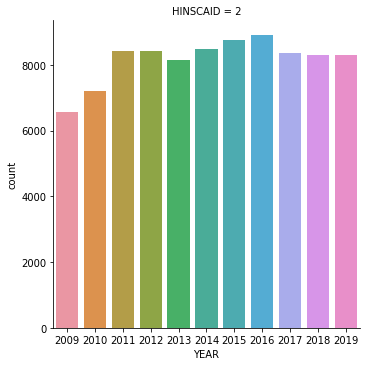

In [43]:
g = sns.catplot(x="YEAR", col="HINSCAID",
                     data=brooklyn, kind="count")

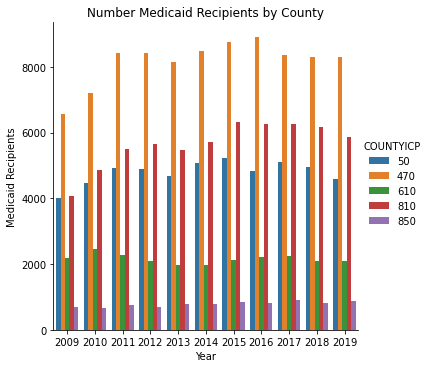

In [49]:
h = sns.catplot(x="YEAR", hue="COUNTYICP", col="HINSCAID",
                     data=df, kind="count")
plt.ylabel('Medicaid Recipients')
plt.xlabel('Year')
plt.title('Number Medicaid Recipients by County')
plt.savefig('Medicaid Population 2009-2019 by NYC County.png', bbox_inches='tight')

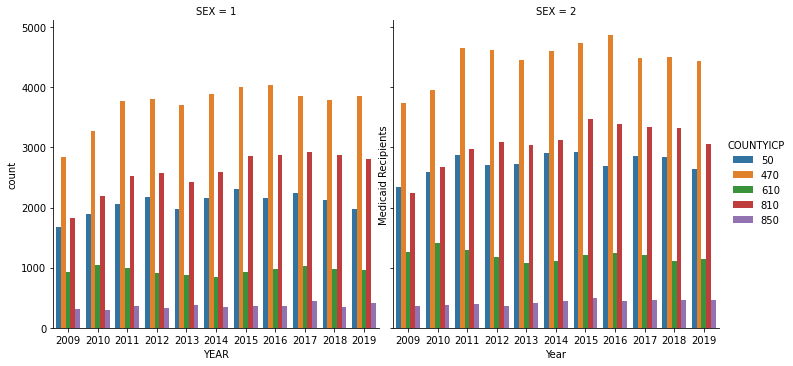

In [51]:
i = sns.catplot(x="YEAR", hue="COUNTYICP", col="SEX",
                     data=df, kind="count")
plt.ylabel('Medicaid Recipients')
plt.xlabel('Year')
plt.savefig('Medicaid Population 2009-2019 by NYC County and Sex.png', bbox_inches='tight')

In [31]:
df.groupby('YEAR').head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEICP,COUNTYICP,PUMA,STRATA,...,HISPAND,CITIZEN,YRSUSA2,HINSEMP,HINSPUR,HINSCAID,EMPSTAT,EMPSTATD,INCTOT,POVERTY
0,2009,200901,816419,89,150.0,2009008164191,13,810,4101,410136,...,0,2,5,2,1,2,1,10,3800,33
1,2009,200901,816422,147,213.0,2009008164221,13,470,4015,401536,...,0,3,2,1,1,2,1,10,15000,93
2,2009,200901,816422,147,213.0,2009008164221,13,470,4015,401536,...,0,3,2,1,1,2,3,30,0,93
3,2009,200901,816422,147,213.0,2009008164221,13,470,4015,401536,...,0,3,2,1,1,2,0,0,0,93
4,2009,200901,816422,147,213.0,2009008164221,13,470,4015,401536,...,0,3,2,1,1,2,0,0,9999999,93
17532,2010,201001,824556,155,75.0,2010008245561,13,810,4101,410136,...,0,0,0,1,1,2,0,0,9999999,323
17533,2010,201001,824562,237,74.0,2010008245621,13,810,4114,411436,...,0,0,0,1,2,2,3,30,8000,53
17534,2010,201001,824562,237,74.0,2010008245621,13,810,4114,411436,...,0,0,0,2,2,2,0,0,9999999,53
17535,2010,201001,824567,276,111.0,2010008245671,13,610,3801,380136,...,460,2,5,1,1,2,1,10,128500,501
17536,2010,201001,824567,276,111.0,2010008245671,13,610,3801,380136,...,460,3,2,1,1,2,1,10,10000,501


In [6]:
mcaid.groupby('YEAR').count()

,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEICP,COUNTYICP,PUMA,STRATA,GQ,...,HISPAND,CITIZEN,YRSUSA2,HINSEMP,HINSPUR,HINSCAID,EMPSTAT,EMPSTATD,INCTOT,POVERTY
YEAR,,,,,,,,,,,,,,,,,,,,,
2009,17532,17532,17532,17532,17532,17532,17532,17532,17532,17532,...,17532,17532,17532,17532,17532,17532,17532,17532,17532,17532
2010,19674,19674,19674,19674,19674,19674,19674,19674,19674,19674,...,19674,19674,19674,19674,19674,19674,19674,19674,19674,19674
2011,21881,21881,21881,21881,21881,21881,21881,21881,21881,21881,...,21881,21881,21881,21881,21881,21881,21881,21881,21881,21881
2012,21746,21746,21746,21746,21746,21746,21746,21746,21746,21746,...,21746,21746,21746,21746,21746,21746,21746,21746,21746,21746
2013,21056,21056,21056,21056,21056,21056,21056,21056,21056,21056,...,21056,21056,21056,21056,21056,21056,21056,21056,21056,21056
2014,22018,22018,22018,22018,22018,22018,22018,22018,22018,22018,...,22018,22018,22018,22018,22018,22018,22018,22018,22018,22018
2015,23285,23285,23285,23285,23285,23285,23285,23285,23285,23285,...,23285,23285,23285,23285,23285,23285,23285,23285,23285,23285
2016,23040,23040,23040,23040,23040,23040,23040,23040,23040,23040,...,23040,23040,23040,23040,23040,23040,23040,23040,23040,23040
2017,22842,22842,22842,22842,22842,22842,22842,22842,22842,22842,...,22842,22842,22842,22842,22842,22842,22842,22842,22842,22842


In [24]:
g_mcaid = mcaid[['YEAR', 'HINSCAID', 'COUNTYICP']]

Text(0.5, 1.0, 'Medicaid Recipients Over Time in NYC')

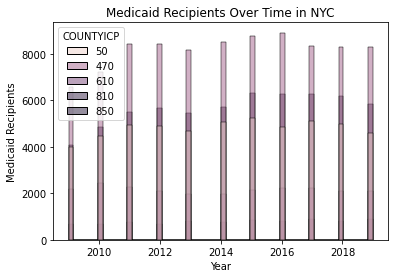

In [26]:
sns.histplot(x='YEAR', hue='COUNTYICP', data=g_mcaid)
plt.ylabel('Medicaid Recipients')
plt.xlabel('Year')
plt.title('Medicaid Recipients Over Time in NYC')